# Problem Statement 1
### Feedforward neural network
### Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:
        a. Import the necessary packages
        b. Load the training and testing data
        c. Define the network architecture using Keras
        d. Train the model using SGD with 11 epochs
        e. Evaluate the network
        f. Plot the training loss and accuracy
#### Implementation here

### a. Import the necessary packages

In [38]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

### b. Load training and Testing data

In [39]:
((X_train, Y_train),(x_test, y_test))=mnist.load_data()
# X_train.shape

In [40]:
# X_train.reshape((X_train.shape[0], -1)) flattens each image in the training set.
# X_train.shape[0] is the number of samples in the training dataset, and -1 allows NumPy to infer the second dimension automatically based on the total size of the array. This results in each image being transformed from a 2D (e.g., 28x28 pixels) to a 1D vector (784 elements if it’s 28x28).
# The same process is applied to x_test, flattening each image in the test set.

X_train=X_train.reshape((X_train.shape[0], -1))
x_test=x_test.reshape((x_test.shape[0], -1))
X_train=X_train/255.0
x_test=x_test/255.0
# X_train.shape

In [41]:
#  to encode the labels Y_train and y_test into a format suitable for training a neural network model, specifically a one-hot encoded format.
#  lb.fit_transform(Y_train) does two things:
# fit: It learns the unique classes present in Y_train (for example, for MNIST, it learns classes 0 through 9).
# transform: It converts each class label in Y_train into a one-hot encoded vector. For example, if a label is 3 and there are 10 classes, it will be converted to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
lb=LabelBinarizer()

Y_train=lb.fit_transform(Y_train)
y_test=lb.transform(y_test)

### c. Defining network architecture using Keras

In [42]:
# initialise model

model=Sequential()
model.add(Dense(128, input_shape=(784,),activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### d. Train the model using SGD with 11 epochs

In [43]:
sgd=SGD(0.01)
epochs=11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H=model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1216 - loss: 2.3276 - val_accuracy: 0.2516 - val_loss: 2.2542
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2679 - loss: 2.2426 - val_accuracy: 0.4101 - val_loss: 2.1940
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4177 - loss: 2.1795 - val_accuracy: 0.4686 - val_loss: 2.1128
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4996 - loss: 2.0938 - val_accuracy: 0.5435 - val_loss: 1.9987
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5713 - loss: 1.9735 - val_accuracy: 0.6251 - val_loss: 1.8471
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6194 - loss: 1.8172 - val_accuracy: 0.6752 - val_loss: 1.6660
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6684 - loss: 1.6348 - val_accuracy: 0.7131 - val_loss: 1.4757
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7060 - loss: 1.4476 - val_accuracy: 0.

### e. Evaluate Network

In [44]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       980
           1       0.80      0.98      0.88      1135
           2       0.84      0.73      0.78      1032
           3       0.75      0.82      0.78      1010
           4       0.76      0.73      0.75       982
           5       0.78      0.56      0.65       892
           6       0.84      0.89      0.86       958
           7       0.86      0.86      0.86      1028
           8       0.82      0.66      0.73       974
           9       0.70      0.74      0.72      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.80      0.79     10000



In [49]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7739 - loss: 0.9644
Loss=0.917
Accuracy=0.799


### f. Plot training loss and accuracy

[]

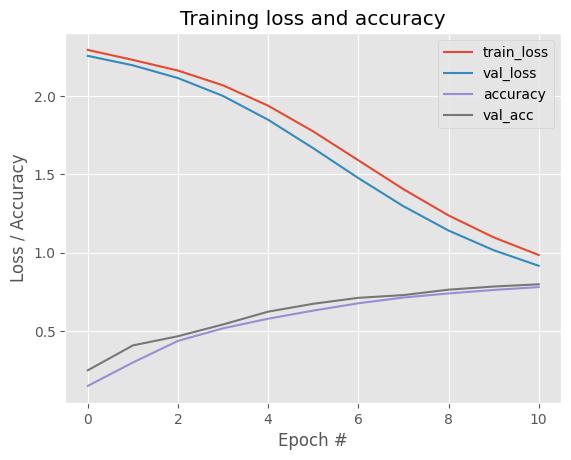

In [45]:
# H.history["loss"] accesses the training loss recorded after each epoch from the model’s history (recorded by H = model.fit(...)).
# H.history["val_loss"] holds the validation loss for each epoch. This line plots the validation loss, providing insight into how well the model generalizes to unseen data.

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs), H.history["val_accuracy"], label="val_acc")

plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.plot()